<a href="https://colab.research.google.com/github/plaban1981/Feature_Selection/blob/master/Mutual_Or_Information_gain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Information gain - mutual information

Mutual information measures how much information the presence/absence of a feature contributes to making the correct prediction on Y.

As extracted from [wikipedia](https://en.wikipedia.org/wiki/Mutual_information):

Mutual information measures the information that X and Y share: It measures how much knowing one of these variables reduces uncertainty about the other. For example, if X and Y are independent, then knowing X does not give any information about Y and vice versa, so their mutual information is zero. At the other extreme, if X is a deterministic function of Y and Y is a deterministic function of X then all information conveyed by X is shared with Y: knowing X determines the value of Y and vice versa. As a result, in this case the mutual information is the same as the uncertainty contained in Y (or X) alone, namely the entropy of Y (or X). Moreover, this mutual information is the same as the entropy of X and as the entropy of Y. (A very special case of this is when X and Y are the same random variable.)

I will demonstrate how to select features based on mutual information using sklearn on a regression and classification problem. For classification I will use the Paribas claims dataset from Kaggle. For regression, the House Price dataset from Kaggle.

In [1]:
from google.colab import files
files.upload()

Saving train_paribas.csv to train_paribas.csv


In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [3]:
# load dataset
data = pd.read_csv('train_paribas.csv', nrows=50000)
data.shape

(50000, 133)

In [4]:
data.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,...,v92,v93,v94,v95,v96,v97,v98,v99,v100,v101,v102,v103,v104,v105,v106,v107,v108,v109,v110,v111,v112,v113,v114,v115,v116,v117,v118,v119,v120,v121,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,9.999999,0.503281,16.434108,6.085711,2.866830,11.636387,1.355013,8.571429,3.670350,0.106720,0.148883,18.869283,7.730923,XDX,-1.716131e-08,C,0.139412,1.720818,3.393503,0.590122,8.880867,C,A,1.083033,1.010829,7.270147,8.375452,11.326592,0.454546,0,...,0.442252,5.814018,3.517720,0.462019,7.436824,5.454545,8.877414,1.191337,19.470199,8.389237,2.757375,4.374296,1.574039,0.007294,12.579184,E,2.382692,3.930922,B,0.433213,O,NaN,15.634907,2.857144,1.951220,6.592012,5.909091,-6.297423e-07,1.059603,0.803572,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,NaN,1.312910,NaN,6.507647,NaN,11.636386,NaN,NaN,NaN,NaN,NaN,NaN,6.763110,GUV,NaN,C,3.056144,NaN,NaN,NaN,NaN,C,A,NaN,NaN,3.615077,NaN,14.579479,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,8.303967,NaN,NaN,NaN,NaN,NaN,NaN,1.505335,NaN,B,1.825361,4.247858,A,NaN,U,G,10.308044,NaN,NaN,10.595357,NaN,NaN,NaN,NaN,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,12.666667,0.765864,14.756098,6.384670,2.505589,9.603542,1.984127,5.882353,3.170847,0.244541,0.144258,17.952332,5.245035,FQ,-2.785053e-07,E,0.113997,2.244897,5.306122,0.836005,7.499999,NaN,A,1.454082,1.734693,4.043864,7.959184,12.730517,0.259740,0,...,0.271480,5.156559,4.214944,0.309657,5.663265,5.974026,11.588858,0.841837,15.491329,5.879353,3.292788,5.924457,1.668401,0.008275,11.670572,C,1.375753,1.184211,B,3.367348,S,NaN,11.205561,12.941177,3.129253,3.478911,6.233767,-2.792745e-07,2.138728,2.238806,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,8.965516,6.542669,16.347483,9.646653,3.903302,14.094723,1.945044,5.517242,3.610789,1.224114,0.231630,18.376407,7.517125,ACUE,-4.805344e-07,D,0.148843,1.308269,2.303640,8.926662,8.874521,C,B,1.587644,1.666667,8.703550,8.898468,11.302795,0.433735,0,...,0.763925,5.498902,3.423944,0.832518,7.375480,6.746988,6.942002,1.334611,18.256352,8.507281,2.503055,4.872157,2.573664,0.113967,12.554274,B,2.230754,1.990131,B,2.643678,J,NaN,13.777666,10.574713,1.511063,4.949609,7.180722,5.655086e-01,1.166281,1.956521,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,1.050328,NaN,6.320087,NaN,10.991098,NaN,NaN,NaN,NaN,NaN,NaN,6.414567,HIT,NaN,E,NaN,NaN,NaN,NaN,NaN,NaN,A,NaN,NaN,6.083151,NaN,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,NaN,NaN,A,NaN,T,G,14.097099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


#### In practice, feature selection should be done after data pre-processing,so ideally, all the categorical variables are encoded into numbers,and then you can assess how deterministic they are of the target


In [5]:
categorical = [ col for col in data.columns if data[col].dtype == 'O']
numerical = [ col for col in data.columns if data[col].dtype != 'O']
print(categorical)
print()
print(numerical)

['v3', 'v22', 'v24', 'v30', 'v31', 'v47', 'v52', 'v56', 'v66', 'v71', 'v74', 'v75', 'v79', 'v91', 'v107', 'v110', 'v112', 'v113', 'v125']

['ID', 'target', 'v1', 'v2', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v21', 'v23', 'v25', 'v26', 'v27', 'v28', 'v29', 'v32', 'v33', 'v34', 'v35', 'v36', 'v37', 'v38', 'v39', 'v40', 'v41', 'v42', 'v43', 'v44', 'v45', 'v46', 'v48', 'v49', 'v50', 'v51', 'v53', 'v54', 'v55', 'v57', 'v58', 'v59', 'v60', 'v61', 'v62', 'v63', 'v64', 'v65', 'v67', 'v68', 'v69', 'v70', 'v72', 'v73', 'v76', 'v77', 'v78', 'v80', 'v81', 'v82', 'v83', 'v84', 'v85', 'v86', 'v87', 'v88', 'v89', 'v90', 'v92', 'v93', 'v94', 'v95', 'v96', 'v97', 'v98', 'v99', 'v100', 'v101', 'v102', 'v103', 'v104', 'v105', 'v106', 'v108', 'v109', 'v111', 'v114', 'v115', 'v116', 'v117', 'v118', 'v119', 'v120', 'v121', 'v122', 'v123', 'v124', 'v126', 'v127', 'v128', 'v129', 'v130', 'v131']


In [6]:
print(data.isnull().sum()[data.isnull().sum() > 0])

v1      21744
v2      21727
v3       1499
v4      21727
v5      21243
        ...  
v126    21744
v127    21744
v128    21243
v130    21749
v131    21771
Length: 119, dtype: int64


## Check for NULL values if any in Categorical Values 

In [7]:
print(data[categorical].isnull().sum()[data[categorical].isnull().sum() > 0])

v3       1499
v22       234
v30     26275
v31      1499
v52         2
v56      2957
v91         2
v107        2
v112      175
v113    24128
v125       39
dtype: int64


#### Check for NULL values if any in Numerical Values 

In [8]:
print(data[numerical].isnull().sum()[data[numerical].isnull().sum() > 0])

v1      21744
v2      21727
v4      21727
v5      21243
v6      21744
        ...  
v126    21744
v127    21744
v128    21243
v130    21749
v131    21771
Length: 108, dtype: int64


## Fill Nan Values with label as 'Missing' for categorical values

In [0]:
data[categorical] = data[categorical].fillna('Missing')

In [10]:
print(data[categorical].isnull().sum()[data[categorical].isnull().sum() > 0])

Series([], dtype: int64)


## Fill Nan Values with label as mode for numerical values

In [0]:
for col in data[numerical].columns:
  col_name = col + "_nan"
  data[col_name] = np.where(data[col].isnull().sum() > 1,1,0)
  data[col] = data[col].fillna(data[col].median())

In [12]:
print(data[numerical].isnull().sum()[data[numerical].isnull().sum() > 0])

Series([], dtype: int64)


In [13]:
data.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,...,v86_nan,v87_nan,v88_nan,v89_nan,v90_nan,v92_nan,v93_nan,v94_nan,v95_nan,v96_nan,v97_nan,v98_nan,v99_nan,v100_nan,v101_nan,v102_nan,v103_nan,v104_nan,v105_nan,v106_nan,v108_nan,v109_nan,v111_nan,v114_nan,v115_nan,v116_nan,v117_nan,v118_nan,v119_nan,v120_nan,v121_nan,v122_nan,v123_nan,v124_nan,v126_nan,v127_nan,v128_nan,v129_nan,v130_nan,v131_nan
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,9.999999,0.503281,16.434108,6.085711,2.866830,11.636387,1.355013,8.571429,3.670350,0.106720,0.148883,18.869283,7.730923,XDX,-1.716131e-08,C,0.139412,1.720818,3.393503,0.590122,8.880867,C,A,1.083033,1.010829,7.270147,8.375452,11.326592,0.454546,0,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1
1,4,1,1.463753,7.027493,C,4.198941,9.191265,2.408972,2.447977,2.301630,9.037901,1.312910,15.500000,6.507647,3.589966,11.636386,1.992754,4.935065,3.544884,0.774612,0.199139,18.032425,6.763110,GUV,1.820158e-07,C,3.056144,1.817907,2.673548,5.058798,8.290219,C,A,1.557322,1.940995,3.615077,8.071302,14.579479,0.641026,0,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,12.666667,0.765864,14.756098,6.384670,2.505589,9.603542,1.984127,5.882353,3.170847,0.244541,0.144258,17.952332,5.245035,FQ,-2.785053e-07,E,0.113997,2.244897,5.306122,0.836005,7.499999,Missing,A,1.454082,1.734693,4.043864,7.959184,12.730517,0.259740,0,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,8.965516,6.542669,16.347483,9.646653,3.903302,14.094723,1.945044,5.517242,3.610789,1.224114,0.231630,18.376407,7.517125,ACUE,-4.805344e-07,D,0.148843,1.308269,2.303640,8.926662,8.874521,C,B,1.587644,1.666667,8.703550,8.898468,11.302795,0.433735,0,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1
4,8,1,1.463753,7.027493,C,4.198941,8.673604,2.408972,2.447977,0.389266,9.037901,1.050328,15.500000,6.320087,3.589966,10.991098,1.992754,4.935065,3.544884,0.774612,0.199139,18.032425,6.414567,HIT,1.820158e-07,E,0.481783,1.817907,2.673548,5.058798,8.290219,Missing,A,1.557322,1.940995,6.083151,8.071302,13.776415,0.641026,0,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1


In [0]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(50000, 114)

### Important

In all feature selection procedures, it is good practice to select the features by examining only the training set. And this is to avoid overfit.

In [14]:
nan_cols = [col for col in data.columns if col.endswith('_nan')]
print(nan_cols)

['ID_nan', 'target_nan', 'v1_nan', 'v2_nan', 'v4_nan', 'v5_nan', 'v6_nan', 'v7_nan', 'v8_nan', 'v9_nan', 'v10_nan', 'v11_nan', 'v12_nan', 'v13_nan', 'v14_nan', 'v15_nan', 'v16_nan', 'v17_nan', 'v18_nan', 'v19_nan', 'v20_nan', 'v21_nan', 'v23_nan', 'v25_nan', 'v26_nan', 'v27_nan', 'v28_nan', 'v29_nan', 'v32_nan', 'v33_nan', 'v34_nan', 'v35_nan', 'v36_nan', 'v37_nan', 'v38_nan', 'v39_nan', 'v40_nan', 'v41_nan', 'v42_nan', 'v43_nan', 'v44_nan', 'v45_nan', 'v46_nan', 'v48_nan', 'v49_nan', 'v50_nan', 'v51_nan', 'v53_nan', 'v54_nan', 'v55_nan', 'v57_nan', 'v58_nan', 'v59_nan', 'v60_nan', 'v61_nan', 'v62_nan', 'v63_nan', 'v64_nan', 'v65_nan', 'v67_nan', 'v68_nan', 'v69_nan', 'v70_nan', 'v72_nan', 'v73_nan', 'v76_nan', 'v77_nan', 'v78_nan', 'v80_nan', 'v81_nan', 'v82_nan', 'v83_nan', 'v84_nan', 'v85_nan', 'v86_nan', 'v87_nan', 'v88_nan', 'v89_nan', 'v90_nan', 'v92_nan', 'v93_nan', 'v94_nan', 'v95_nan', 'v96_nan', 'v97_nan', 'v98_nan', 'v99_nan', 'v100_nan', 'v101_nan', 'v102_nan', 'v103_nan', 

In [15]:
# separate train and test sets
drop_features = ['target', 'ID'] + nan_cols
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=drop_features , axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 131), (15000, 131))

## Label Encoding Training dataset

In [0]:
from sklearn.preprocessing  import LabelEncoder
le = LabelEncoder()
for col in categorical :
  X_train[col] = le.fit_transform(X_train[col])
  X_test[col] = le.fit_transform(X_test[col])

In [17]:
print(X_train.shape)
print(X_test.shape)

(35000, 131)
(15000, 131)


In [18]:
X_train.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,v40,...,v92,v93,v94,v95,v96,v97,v98,v99,v100,v101,v102,v103,v104,v105,v106,v107,v108,v109,v110,v111,v112,v113,v114,v115,v116,v117,v118,v119,v120,v121,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
17967,1.947369,6.969209,2,2.823776,8.394091,1.563910,2.887218,0.344201,11.694915,1.575492,14.982332,6.591193,2.718268,12.239968,2.135635,4.772727,2.403540,0.520885,0.173562,17.194404,6.915828,9102,-1.664218e-07,4,0.392842,1.984962,3.624059,2.841566,7.187969,7,1,1.556391,2.646618,6.338702,6.616542,15.825321,0.729167,0,0.322935,10.263367,...,0.383321,4.611643,3.726897,0.465077,5.473685,6.770833,12.384726,0.689223,15.169606,3.790577,0.870045,5.428267,1.934175,0.173818,10.204086,4,1.471826,2.033606,1,3.789474,15,21,14.121711,9.545454,2.719666,8.003383,7.500001,3.265107e+00,1.899593,3.680982,8.305084,3.444048,1.261967e-01,81,1.486649,6.118421,1.380593,2,1.833333,1.590909
32391,1.463753,7.027493,2,4.198941,8.673604,2.408972,2.447977,0.389266,9.037901,1.816192,15.500000,6.031969,3.589966,13.479091,1.992754,4.935065,3.544884,0.774612,0.199139,18.032425,8.091406,5271,1.820158e-07,3,0.481783,1.817907,2.673548,5.058798,8.290219,7,1,1.557322,1.940995,6.927060,8.071302,13.776415,0.641026,0,0.378684,9.575283,...,0.543714,5.298400,3.746989,0.621672,6.506270,7.434556,7.638207,1.234568,14.474932,6.635132,2.464835,5.130584,2.512436,0.242768,12.078437,4,1.985989,3.102561,1,3.118913,11,21,15.326343,10.476191,2.220009,8.084333,8.122605,1.485053e+00,1.140143,2.433735,6.728972,2.742854,1.398637e-01,33,1.614076,2.967717,1.799131,2,1.560976,1.585366
9341,1.827749,7.587996,2,3.344134,8.673604,3.324743,1.799828,0.389266,9.010600,1.575493,16.170569,6.120770,4.510775,11.780057,1.870789,4.830189,4.142917,1.118807,0.232477,18.415230,6.832481,2973,1.820158e-07,4,0.481783,1.590780,1.284363,9.952961,9.136598,2,0,1.643042,2.276632,5.590102,10.042955,13.776415,1.097851,0,0.068340,11.447072,...,0.881703,5.771542,3.111905,0.989622,7.542955,8.544153,7.638207,1.141895,10.208466,7.601987,2.464835,4.163849,2.650140,0.242768,13.353356,2,1.985989,3.102561,0,4.123711,5,15,13.706146,12.075472,1.683122,8.084333,9.642005,1.485053e+00,0.631713,2.553801,6.749116,2.742854,1.398637e-01,52,1.399995,0.708762,1.799131,0,2.529832,1.735848
7929,0.522894,6.551627,2,6.141825,10.209257,2.634256,2.719051,0.862119,8.712872,3.916849,15.454545,8.456909,3.089171,12.306724,1.953581,7.567567,5.258468,0.954839,0.221163,16.821187,6.202142,4642,-3.843572e-07,4,0.893744,1.803278,3.131713,7.562540,8.078009,0,1,1.492369,1.254947,8.910181,6.704353,12.628317,0.207900,0,0.736702,8.553650,...,0.476053,7.554047,4.472455,0.513287,6.359525,7.068608,9.018875,1.969097,19.082162,11.182671,3.189197,5.536696,2.489368,0.852792,15.570173,2,3.475005,9.033239,1,2.306387,14,21,15.200270,12.252251,2.379286,14.624409,7.234927,-6.794801e-07,0.754996,1.391863,6.633664,1.844494,2.505026e-01,11,2.204730,2.734595,3.090974,2,0.923078,0.900900
46544,2.086927,7.053496,2,3.801169,5.884332,2.070339,2.906437,0.132119,9.322494,1.312909,14.919093,6.245243,3.536104,10.235968,2.184465,6.183575,2.970694,1.041064,0.210689,16.962358,5.349902,5790,-1.783063e-07,3,0.058854,1.727494,3.065694,6.442165,6.834772,2,0,1.712010,2.747179,5.592735,6.635701,13.325401,0.776257,0,0.249710,11.178641,...,0.356735,4.735802,4.554231,0.441138,5.288653,5.707763,10.148983,0.888077,13.306177,6.080472,1.258220,6.030260,2.669000,0.062601,10.335517,3,1.532657,1.151316,0,3.861977,17,3,13.574245,9.371981,2.427185,3.478909,6.484019,4.556388e+00,2.199593,3.481894,5.853658,3.946788,6.090014e-07,22,2.076193,4.615960,1.242660,0,1.890411,1.642512


In [19]:
X_test.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,v40,...,v92,v93,v94,v95,v96,v97,v98,v99,v100,v101,v102,v103,v104,v105,v106,v107,v108,v109,v110,v111,v112,v113,v114,v115,v116,v117,v118,v119,v120,v121,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
11841,1.463753,7.027493,2,4.198941,8.673604,2.408972,2.447977,0.389266,9.037901,1.137856,15.500000,6.116685,3.589966,12.556108,1.992754,4.935065,3.544884,0.774612,0.199139,18.032425,7.760875,2773,1.820158e-07,2,0.481783,1.817907,2.673548,5.058798,8.290219,7,0,1.557322,1.940995,5.959031,8.071302,13.776415,0.641026,0,0.378684,10.423270,...,0.543714,5.298400,3.746989,0.621672,6.506270,7.434556,7.638207,1.234568,1.447493e+01,6.635132,2.464835,5.130584,2.512436,0.242768,12.078437,3,1.985989,3.102561,1,3.118913,19,21,14.159332,10.476191,2.220009,8.084333,8.122605,1.485053,1.140143,2.433735,6.728972,2.742854,0.139864,5,1.614076,2.967717,1.799131,2,1.560976,1.585366
19602,2.703195,4.754142,2,4.483878,10.202250,2.529680,2.164383,7.403781,5.788235,5.229759,15.463042,9.097979,5.663366,14.001096,1.913364,4.784690,4.015877,1.418474,0.285420,18.304211,7.604505,3986,4.640513e-07,2,9.919604,2.410960,1.986301,9.362840,9.794521,2,1,1.684931,1.908677,6.137347,9.406393,12.380432,1.350210,0,0.442003,14.259460,...,0.775534,7.237480,4.594442,0.848538,7.726028,10.801687,4.809262,1.699392,-9.973819e-08,6.994431,10.495238,5.509733,4.230679,7.807930,12.866516,4,3.008590,9.308305,1,1.753425,5,21,10.783054,6.124402,2.386947,14.375231,12.151898,9.281443,0.568012,1.940374,4.635294,5.421954,7.318692,27,2.341459,2.500000,3.147263,3,1.763713,3.062201
45519,1.426368,2.480260,3,2.317863,8.878193,1.757902,2.328450,2.107960,6.986301,4.201313,16.181817,8.133095,3.488317,13.934576,1.396490,4.186047,1.274747,0.804296,0.266901,16.467587,7.723178,2520,7.101970e-07,0,2.674505,1.215626,2.459523,5.544151,5.636083,7,3,1.179645,3.978412,5.377064,8.774094,14.911390,0.662251,0,0.095064,14.426597,...,0.370016,4.141511,4.621998,0.527817,4.672320,5.099337,8.124233,0.819841,3.321617e+00,3.053064,2.442821,7.551591,2.454020,1.396972,5.434499,3,2.005950,3.924369,2,7.031612,14,21,10.909293,11.782945,2.106704,9.877686,5.695364,15.026699,0.755711,6.081081,3.356164,8.021461,0.507152,11,1.490969,3.064765,1.840790,0,3.417218,0.775193
25747,2.254135,8.384272,2,4.378511,9.717056,2.541340,2.552945,2.256101,7.512691,1.859956,15.643328,7.061446,3.928545,11.503289,1.431087,5.605095,5.530571,1.004311,0.193549,18.117310,6.156592,5998,-7.144855e-07,2,2.432953,2.297651,2.390485,7.367971,8.784449,2,0,1.288076,1.821873,7.750187,8.854076,14.032667,0.954545,0,0.076132,8.317778,...,0.566607,7.464377,3.674880,0.626533,7.043806,8.909092,5.282143,1.170100,1.064039e+01,8.395518,3.590823,4.877303,2.491841,1.776877,15.394131,1,2.592694,5.460371,1,2.228025,5,21,15.253035,8.152867,2.589168,11.912347,9.818182,1.758995,0.900774,1.923345,5.279188,1.566345,1.776463,52,1.670410,2.034378,2.284966,0,1.427272,2.675160
42642,1.463753,7.027493,2,4.198941,8.673604,2.408972,2.447977,0.389266,9.037901,1.291028,15.500000,6.487352,3.589966,12.165338,1.992754,4.935065,3.544884,0.774612,0.199139,18.032425,7.227103,717,1.820158e-07,4,0.481783,1.817907,2.673548,5.058798,8.290219,7,0,1.557322,1.940995,4.900676,8.071302,13.776415,0.641026,0,0.378684,12.250922,...,0.543714,5.298400,3.746989,0.621672,6.506270,7.434556,7.638207,1.234568,1.447493e+01,6.635132,2.464835,5.130584,2.512436,0.242768,12.078437,0,1.985989,3.102561,1,3.118913,5,21,12.365472,10.476191,2.220009,8.084333,8.122605,1.485053,1.140143,2.433735,6.728972,2.742854,0.139864,16,1.614076,2.967717,1.799131,0,1.560976,1.585366


In [20]:
# calculate the mutual information between the variables and the target
# this returns the mutual information value of each feature
# the smaller the value the less information the feature has about the
# target
mi = mutual_info_classif(X_train, y_train)
mi

array([0.00171164, 0.00572707, 0.00383585, 0.00445447, 0.00559076,
       0.0032913 , 0.006715  , 0.00669779, 0.00626895, 0.02544424,
       0.00357959, 0.01723577, 0.00750681, 0.02262038, 0.0073645 ,
       0.0051261 , 0.00278589, 0.00373708, 0.00492115, 0.00237575,
       0.01182084, 0.00821242, 0.        , 0.00556045, 0.0027252 ,
       0.00308645, 0.0058272 , 0.00497222, 0.0025607 , 0.00053378,
       0.02208852, 0.00504687, 0.00650189, 0.00851526, 0.0086843 ,
       0.0042903 , 0.0044965 , 0.00523394, 0.00705548, 0.00711717,
       0.00720775, 0.00659218, 0.00655618, 0.00654407, 0.00575874,
       0.00756511, 0.01585178, 0.00563299, 0.00635285, 0.03921109,
       0.00590697, 0.00208125, 0.00267305, 0.00559998, 0.00130918,
       0.02836292, 0.00580224, 0.00366845, 0.0051739 , 0.00457181,
       0.00711015, 0.01442996, 0.00588882, 0.00546686, 0.00746289,
       0.01454743, 0.00545105, 0.        , 0.0043671 , 0.00229478,
       0.00232749, 0.00896832, 0.00447393, 0.00528967, 0.     

In [21]:
# let's add the variable names and order the features
# according to the MI for clearer visualisation
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False)

v50     0.039211
v56     0.028363
v10     0.025444
v79     0.023936
v14     0.022620
          ...   
v87     0.000176
v102    0.000000
v23     0.000000
v75     0.000000
v68     0.000000
Length: 131, dtype: float64

In [22]:
df_mutual = pd.DataFrame({'Feature':X_train.columns,'Mutual_Information':mi})
df_mutual.head()

,Feature,Mutual_Information
v1,v1,0.001712
v2,v2,0.005727
v3,v3,0.003836
v4,v4,0.004454
v5,v5,0.005591


Text(0.5, 1.0, 'Top 20 Features with high Mutual Information score')

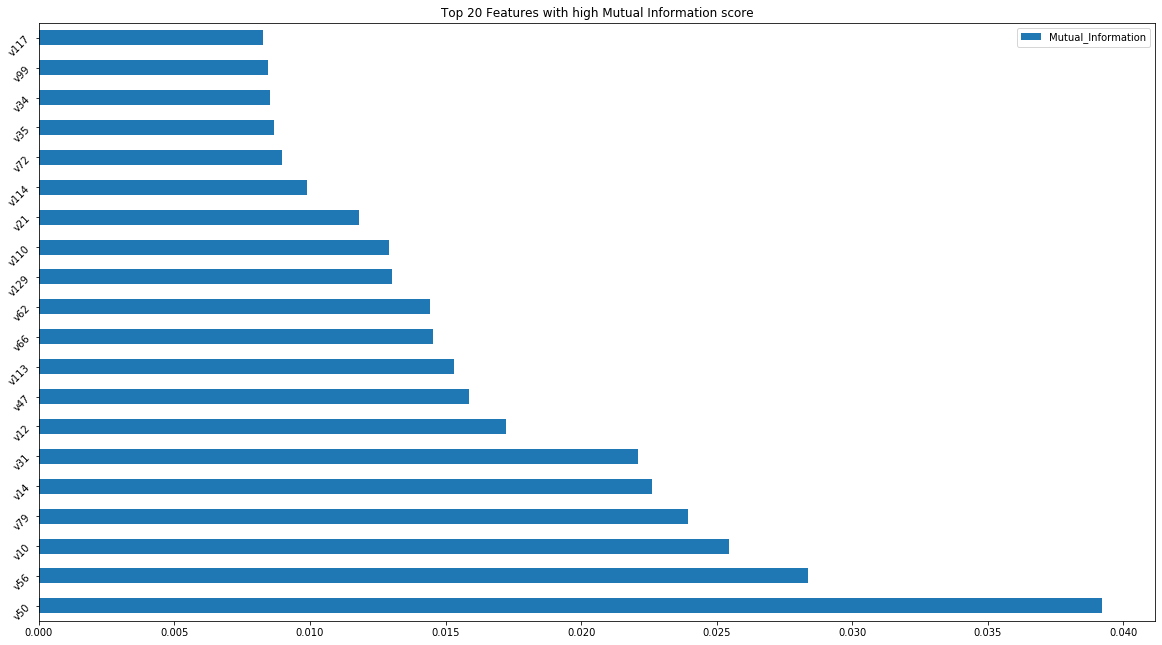

In [23]:
df_mutual.sort_values(by='Mutual_Information',ascending=False).head(20).plot.barh(figsize=(20,11 ),rot=45)
plt.title('Top 20 Features with high Mutual Information score')

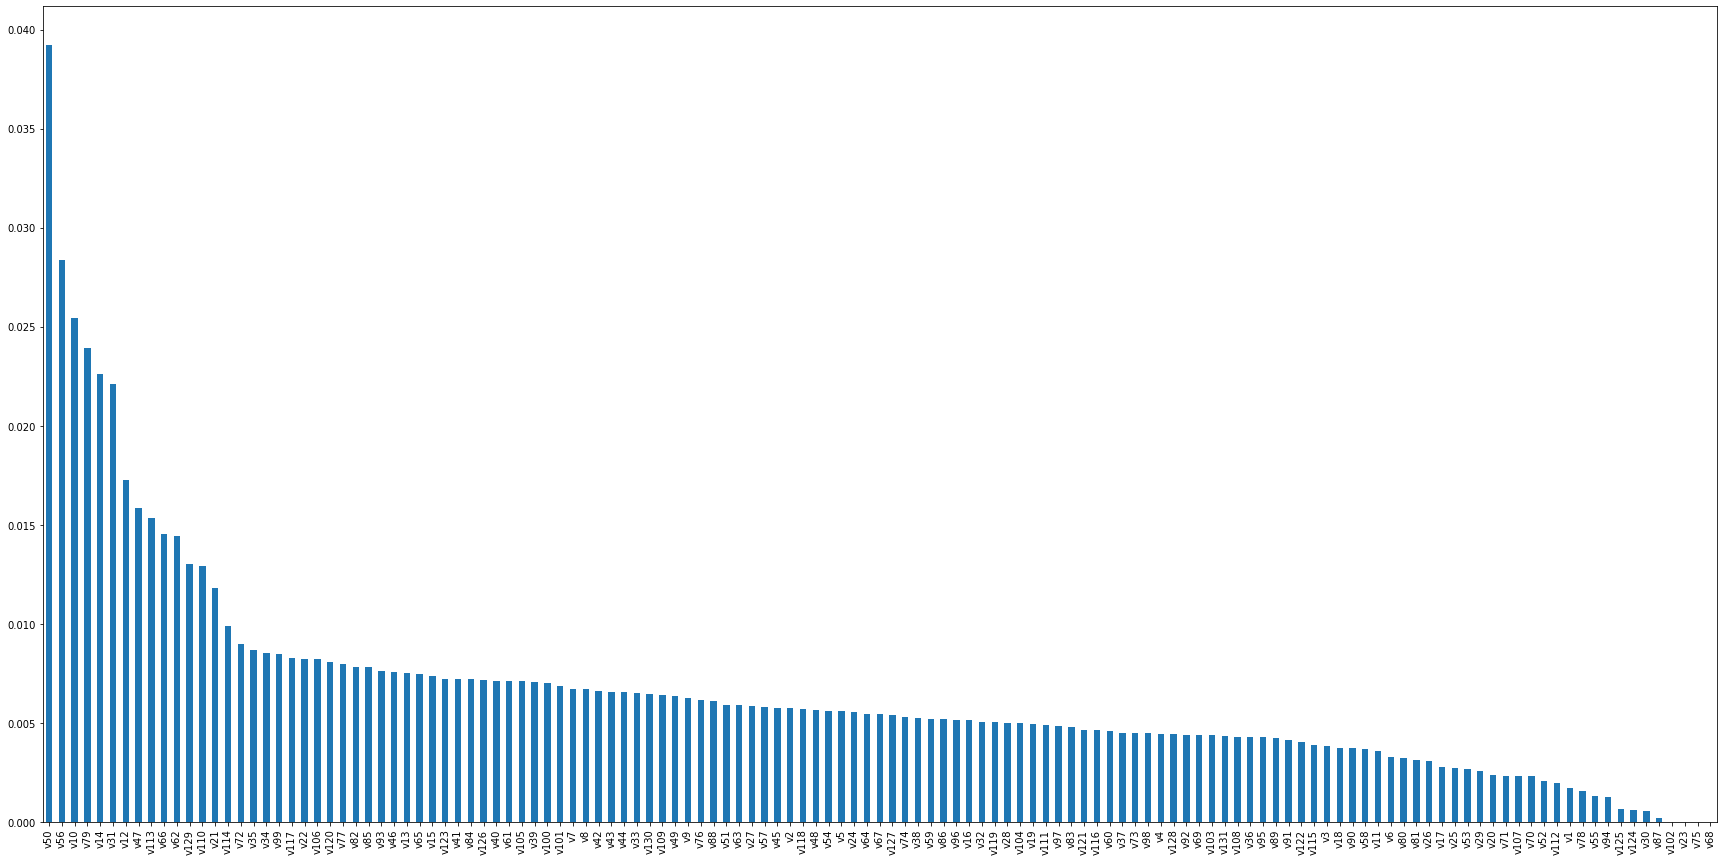

In [24]:
# and now let's plot the ordered MI values per feature
mi.sort_values(ascending=False).plot.bar(figsize=(30, 15),rot=90)

Comparatively, we can see that there are a few features (left of the plot) that seem to contribute the most to predicting the target.There are also a few features with almost zero MI values on the right of the plot.

As I explained in the previous lecture, where to put the cut-off to select features is arbitrary. One could choose a certain value of MI after studying the plot above. An alternative and most frequent way of selecting features is to select the top 10, or top 20 features, or the features in the the top 10th percentile of the MI value distribution.

To do this, you can use mutual info in combination with SelectKBest or SelectPercentile from sklearn. SelectKBest allows you to determine how many features, and SelectPercentile the features within a certain percentile. See below.

In [26]:
# here I will select the top 10 features
# which are shown below
sel_ = SelectKBest(mutual_info_classif, k=20).fit(X_train, y_train)
print(f'The best 20 Features selected by SelectKBest Algorithm based on Mutal Information Score \n {X_train.columns[sel_.get_support()].tolist()}')


The best 20 Features selected by SelectKBest Algorithm based on Mutal Information Score 
 ['v3', 'v6', 'v10', 'v12', 'v14', 'v21', 'v31', 'v47', 'v50', 'v51', 'v56', 'v62', 'v65', 'v66', 'v79', 'v103', 'v110', 'v113', 'v114', 'v129']


In [29]:
X_train[X_train.columns[sel_.get_support()].tolist()].head()

,v3,v6,v10,v12,v14,v21,v31,v47,v50,v51,v56,v62,v65,v66,v79,v103,v110,v113,v114,v129
17967,2,1.563910,1.575492,6.591193,12.239968,6.915828,1,2,1.682929,9.280021,38,1,14.604623,0,1,5.428267,1,21,14.121711,2
32391,2,2.408972,1.816192,6.031969,13.479091,8.091406,1,2,3.728267,7.128986,69,1,16.253557,0,1,5.130584,1,21,15.326343,2
9341,2,3.324743,1.575493,6.120770,11.780057,6.832481,0,7,2.990242,7.128986,62,1,16.618483,0,2,4.163849,0,15,13.706146,0
7929,2,2.634256,3.916849,8.456909,12.306724,6.202142,1,2,1.276502,4.320255,69,1,15.841931,0,1,5.536696,1,21,15.200270,2
46544,2,2.070339,1.312909,6.245243,10.235968,5.349902,0,7,2.108429,7.261458,83,1,14.512645,0,8,6.030260,0,3,13.574245,0


### Regression

In [30]:
from google.colab import files
files.upload()

Saving housing_train.csv to housing_train.csv


{'housing_train.csv': b'Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice\n1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,Viny

In [31]:
# load dataset
data = pd.read_csv('housing_train.csv')
data.shape

(1460, 81)

## Summary Statistics

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [0]:
cat_cols = [col for col in data.columns if data[col].dtype == 'O']
num_cols = [col for col in data.columns if data[col].dtype != 'O']

In [35]:
print(cat_cols)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


## Check for Null values if any in Categorical Columns

In [37]:
data[cat_cols].isnull().sum()[data[cat_cols].isnull().sum() > 0]

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

## Replace Missing Values with 'Missing' as the label

In [0]:
for col in cat_cols:
  data[col] = data[col].fillna('Missing')

In [39]:
data[cat_cols].isnull().sum()[data[cat_cols].isnull().sum() > 0]

Series([], dtype: int64)

In [36]:
print(num_cols)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [0]:
for col in data[num_cols].columns:
  col_name = col + "_nan"
  data[col_name] = np.where(data[col].isnull().sum() > 1,1,0)
  data[col] = data[col].fillna(data[col].median())

In [41]:
data[num_cols].isnull().sum()[data[num_cols].isnull().sum() > 0]

Series([], dtype: int64)

In [0]:
# In practice, feature selection should be done after data pre-processing,
# so ideally, all the categorical variables are encoded into numbers,
# and then you can assess how deterministic they are of the target

# here for simplicity I will use only numerical variables
# select numerical columns:

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(1460, 38)

In [42]:
nan_cols = [ col for col in data.columns if col.endswith('_nan')]
print(nan_cols)

['Id_nan', 'MSSubClass_nan', 'LotFrontage_nan', 'LotArea_nan', 'OverallQual_nan', 'OverallCond_nan', 'YearBuilt_nan', 'YearRemodAdd_nan', 'MasVnrArea_nan', 'BsmtFinSF1_nan', 'BsmtFinSF2_nan', 'BsmtUnfSF_nan', 'TotalBsmtSF_nan', '1stFlrSF_nan', '2ndFlrSF_nan', 'LowQualFinSF_nan', 'GrLivArea_nan', 'BsmtFullBath_nan', 'BsmtHalfBath_nan', 'FullBath_nan', 'HalfBath_nan', 'BedroomAbvGr_nan', 'KitchenAbvGr_nan', 'TotRmsAbvGrd_nan', 'Fireplaces_nan', 'GarageYrBlt_nan', 'GarageCars_nan', 'GarageArea_nan', 'WoodDeckSF_nan', 'OpenPorchSF_nan', 'EnclosedPorch_nan', '3SsnPorch_nan', 'ScreenPorch_nan', 'PoolArea_nan', 'MiscVal_nan', 'MoSold_nan', 'YrSold_nan', 'SalePrice_nan']


In [0]:
drop_features = ['Id','SalePrice'] + nan_cols

## separate train and test sets

In [45]:

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(drop_features , axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1022, 79), (438, 79))

##LABEL Encoding Train and Test data

In [0]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
for col in cat_cols :
  X_train[col] = lb.fit_transform(X_train[col])
  X_test[col] = lb.fit_transform(X_test[col])

## determine the mutual information

In [48]:
mi = mutual_info_regression(X_train.fillna(0), y_train)
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False)

OverallQual     0.532111
Neighborhood    0.505106
GrLivArea       0.480295
TotalBsmtSF     0.385996
GarageCars      0.385026
                  ...   
MiscVal         0.000000
Utilities       0.000000
Street          0.000000
MoSold          0.000000
BsmtFinSF2      0.000000
Length: 79, dtype: float64

In [50]:
df_housing_mi = pd.DataFrame({'Features':X_train.columns,'Mutual_Information_Score':mi})
df_housing_mi = df_housing_mi.sort_values(by='Mutual_Information_Score',ascending=False)
df_housing_mi.head(20)

,Features,Mutual_Information_Score
OverallQual,OverallQual,0.532111
Neighborhood,Neighborhood,0.505106
GrLivArea,GrLivArea,0.480295
TotalBsmtSF,TotalBsmtSF,0.385996
GarageCars,GarageCars,0.385026
GarageArea,GarageArea,0.370088
YearBuilt,YearBuilt,0.348729
BsmtQual,BsmtQual,0.325213
1stFlrSF,1stFlrSF,0.312427
KitchenQual,KitchenQual,0.305552


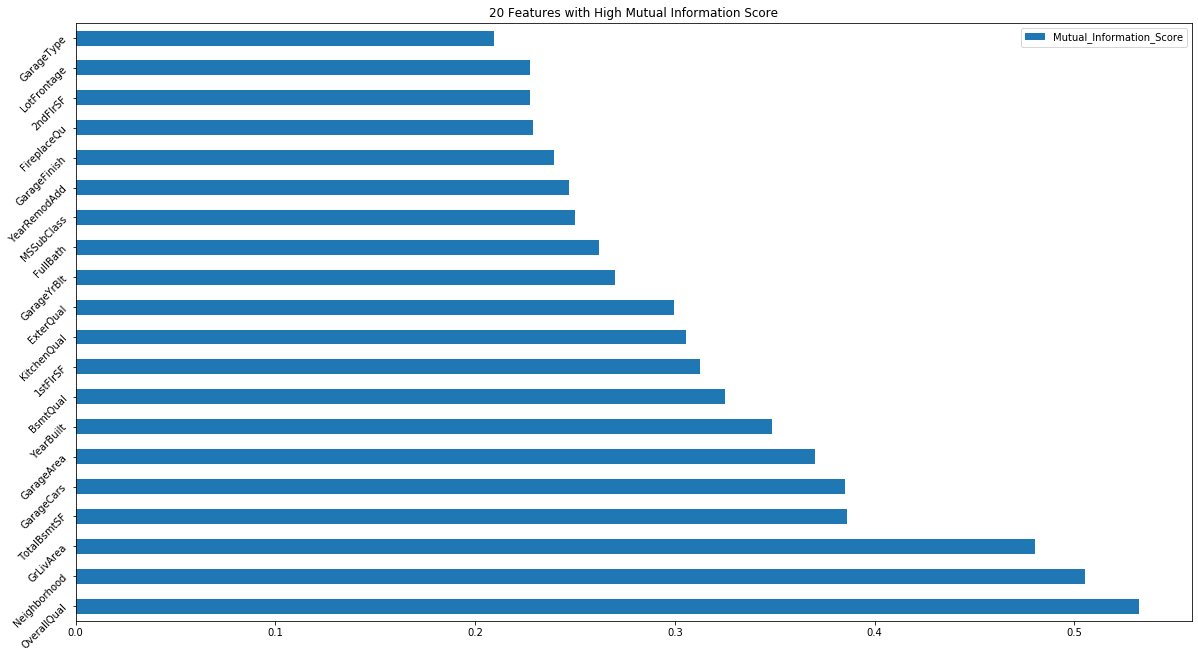

In [55]:
df_housing_mi.head(20).plot.barh(figsize=(20,11 ),rot=45)
plt.title('20 Features with High Mutual Information Score')
plt.show()

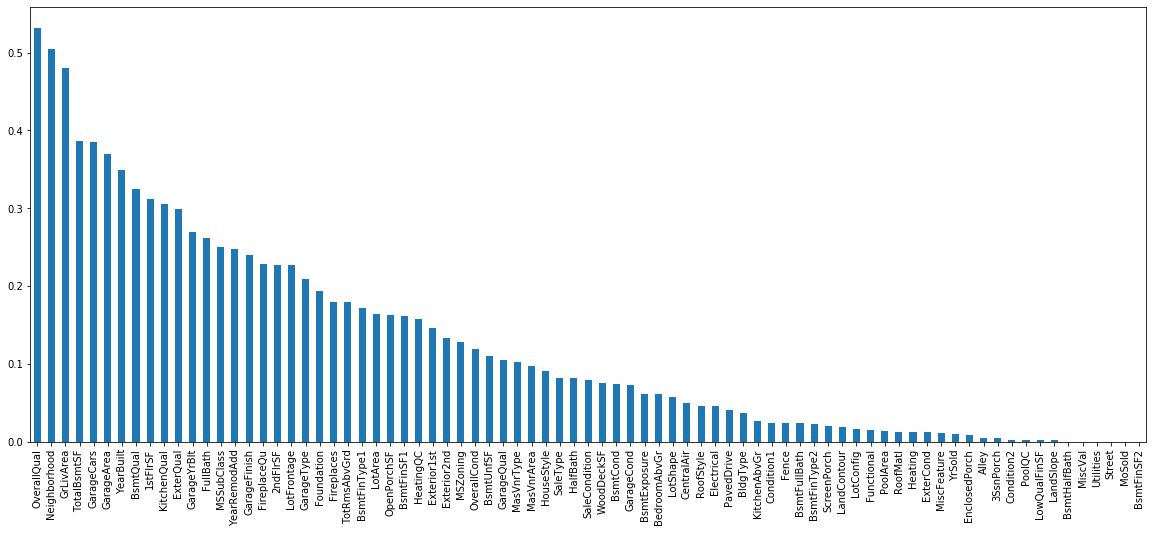

In [56]:
mi.sort_values(ascending=False).plot.bar(figsize=(20,8))

## We will  select the top 20 percentile

In [57]:

sel_ = SelectPercentile(mutual_info_regression, percentile=20).fit(X_train, y_train)
print(f'The best 20 Features selected by SelectKBest Algorithm based on Mutal Information Score \n {X_train.columns[sel_.get_support()]}')

The best 20 Features selected by SelectKBest Algorithm based on Mutal Information Score 
 Index(['MSSubClass', 'Neighborhood', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'ExterQual', 'BsmtQual', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'KitchenQual', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea'],
      dtype='object')


I have not personally used mutual information in any of my projects. However, there is some value in the method. See for example:

Comparison between univariate and mutual information selection in [sklean website](http://scikit-learn.org/stable/auto_examples/feature_selection/plot_f_test_vs_mi.html#sphx-glr-auto-examples-feature-selection-plot-f-test-vs-mi-py)

In addition, mutual information has been widely covered, if anything else from a theoretical perspective, in several articles that I share in the additional reading resources section. Therefore I wanted to have it covered in the course, and I leave it up to you to explore it and see if you find any use in it.

That is all for this lecture, I hope you enjoyed it and see you in the next one!

In [58]:
X_train[X_train.columns[sel_.get_support()]].head()

,MSSubClass,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,ExterQual,BsmtQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,KitchenQual,GarageYrBlt,GarageFinish,GarageCars,GarageArea
64,60,5,7,1997,1998,3,2,1057,1057,2034,2,2,1998.0,2,2,645
682,120,4,6,1996,1997,3,2,1291,1291,1291,1,2,1996.0,3,2,431
960,20,3,5,1958,2008,3,4,858,858,858,1,3,1980.0,1,0,0
1384,50,7,6,1939,1950,3,4,560,698,1258,1,3,1939.0,3,1,280
1100,30,18,2,1920,1950,3,4,290,438,438,1,1,1930.0,3,1,246
